In [2]:
%run C:/Users/HSS/dd.py
print('done')

done


## 1. 인코딩

### - 이미지


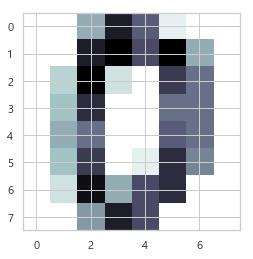

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
plt.imshow(digits.images[0], cmap = mpl.cm.bone_r)

In [17]:
# 8 x 8의 matrix로 이미지가 구성되어 있다.
digits.images[0], digits.images[0].shape

(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]), (8, 8))

In [19]:
# 길이 64의 벡터로 변환되어 모델에 입력된다.
digits.images[0].reshape(-1)

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### 모델을 64차원 입력을 바탕으로 구성했다면 이외의 형식을 갖는 데이터는 들어올 수 없다. 모든 입력 데이터는 차원을 통일해야한다.

### - 문서

- Bag of words 방법을 통해 일정한 길이의 벡터를 만든다.

In [22]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups()
print("입력:\n", news.data[0])
print("출력:\n", news.target_names[news.target[0]])

KeyboardInterrupt: 

### - 결측치 다루기

- 패키지: missingno
- 명령어: `msno.matrix(data)`, `plt.show()`

In [3]:
import missingno as msno

In [4]:
titanic = sns.load_dataset('titanic')
titanic.tail(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


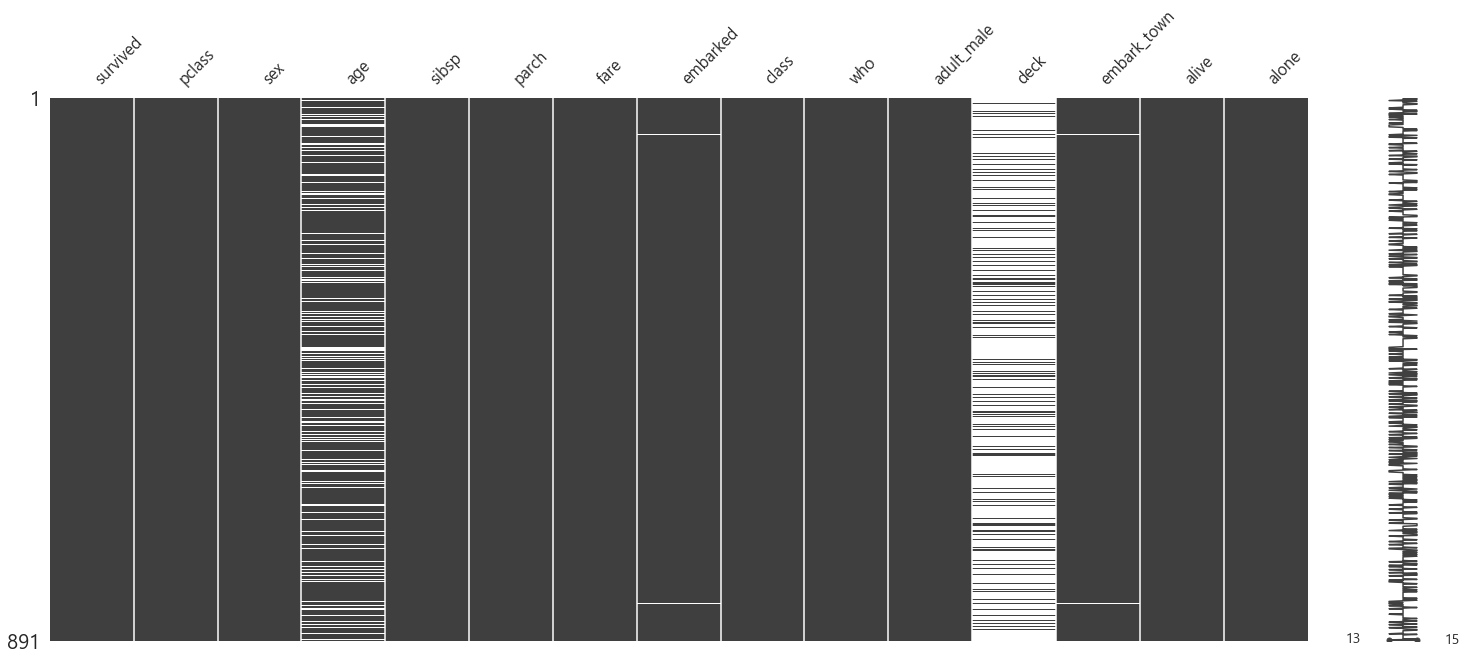

In [5]:
msno.matrix(titanic)
plt.show()

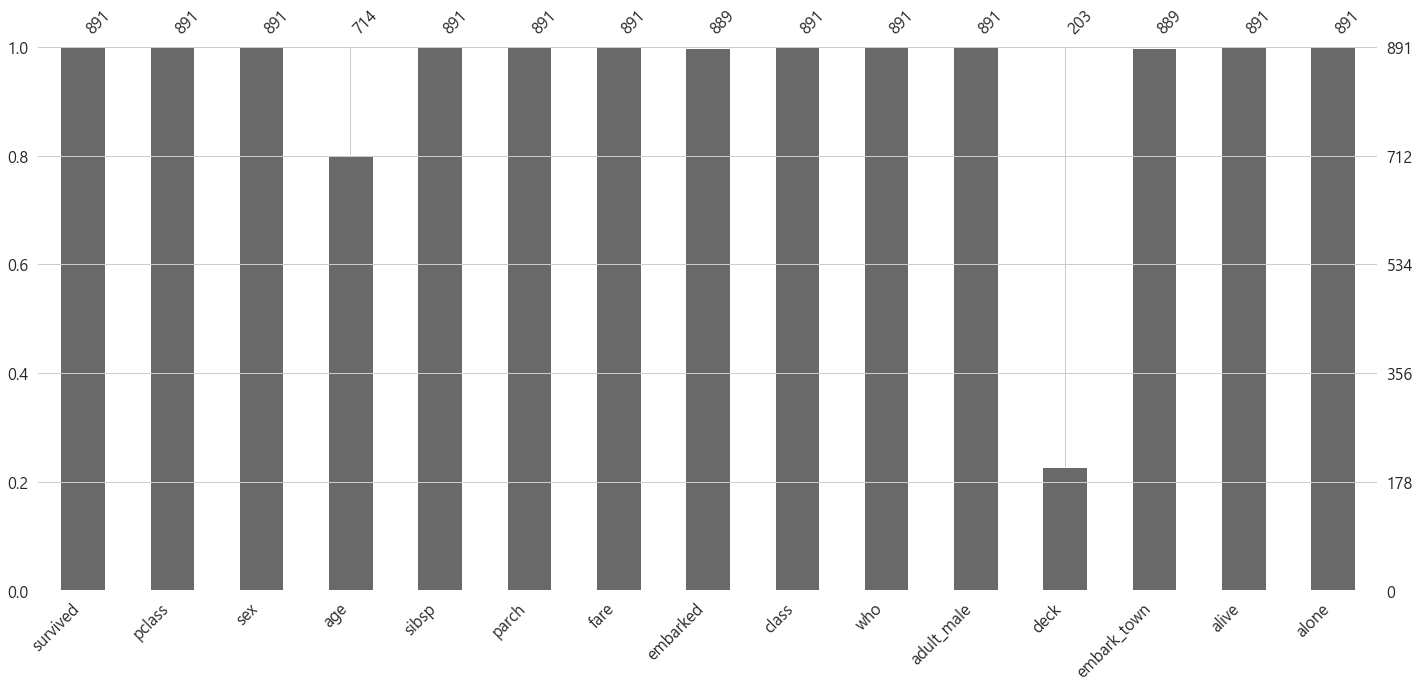

In [6]:
msno.bar(titanic)
plt.show()

### - 처리법 
- 1. 결측치 삭제
- 2. 결측치 대체


#### 결측치 삭제

In [23]:
# 결측치가 있는 모든 행을 지운다.
df = titanic.copy()
df.dropna(inplace = True)
len(df), len(titanic)

(182, 891)

In [24]:
#axis 지정이 가능하다.
df = titanic.copy()
df.dropna(axis = 1, inplace = True)
len(df.columns), len(titanic.columns)


(11, 15)

14 15


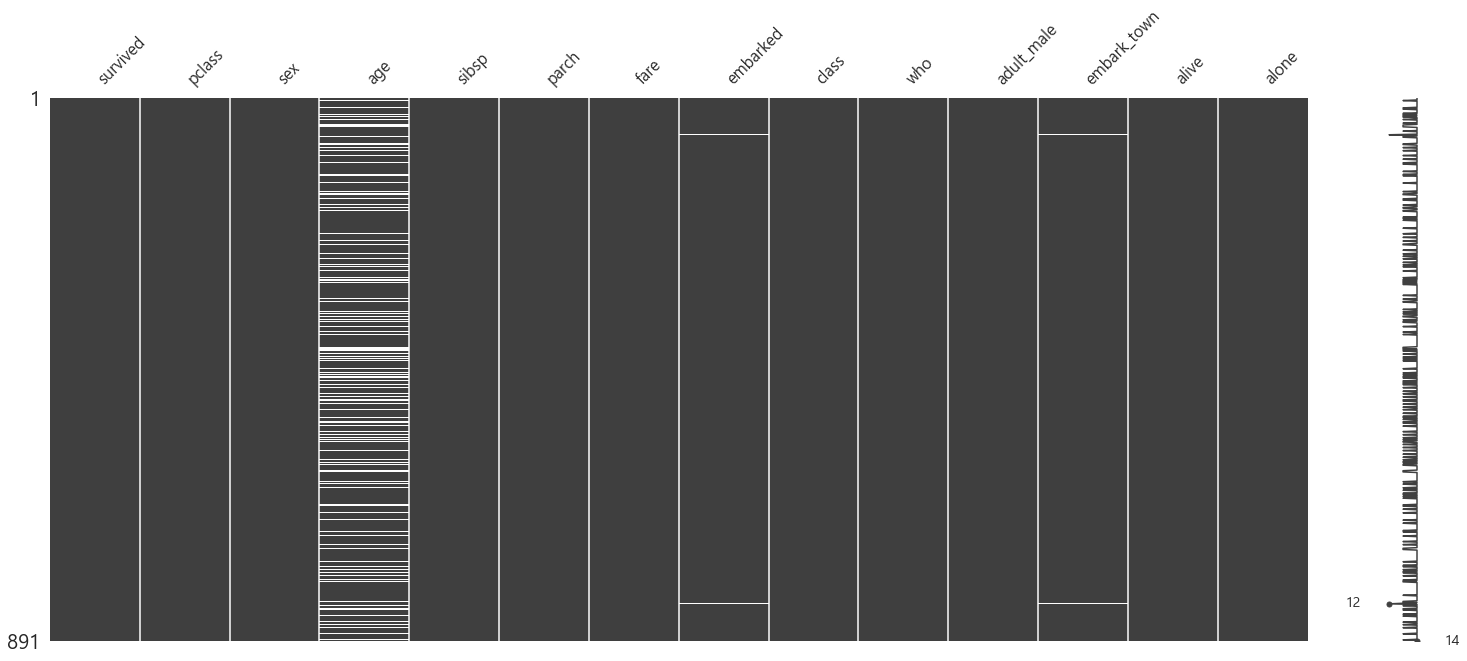

In [25]:
# thresh 인수를 사용해 drop 조건을 지정할 수 있다.

df = titanic.copy()
df.dropna(thresh = 700, axis = 1, inplace = True)
print(len(df.columns), len(titanic.columns))

msno.matrix(df)
plt.show()


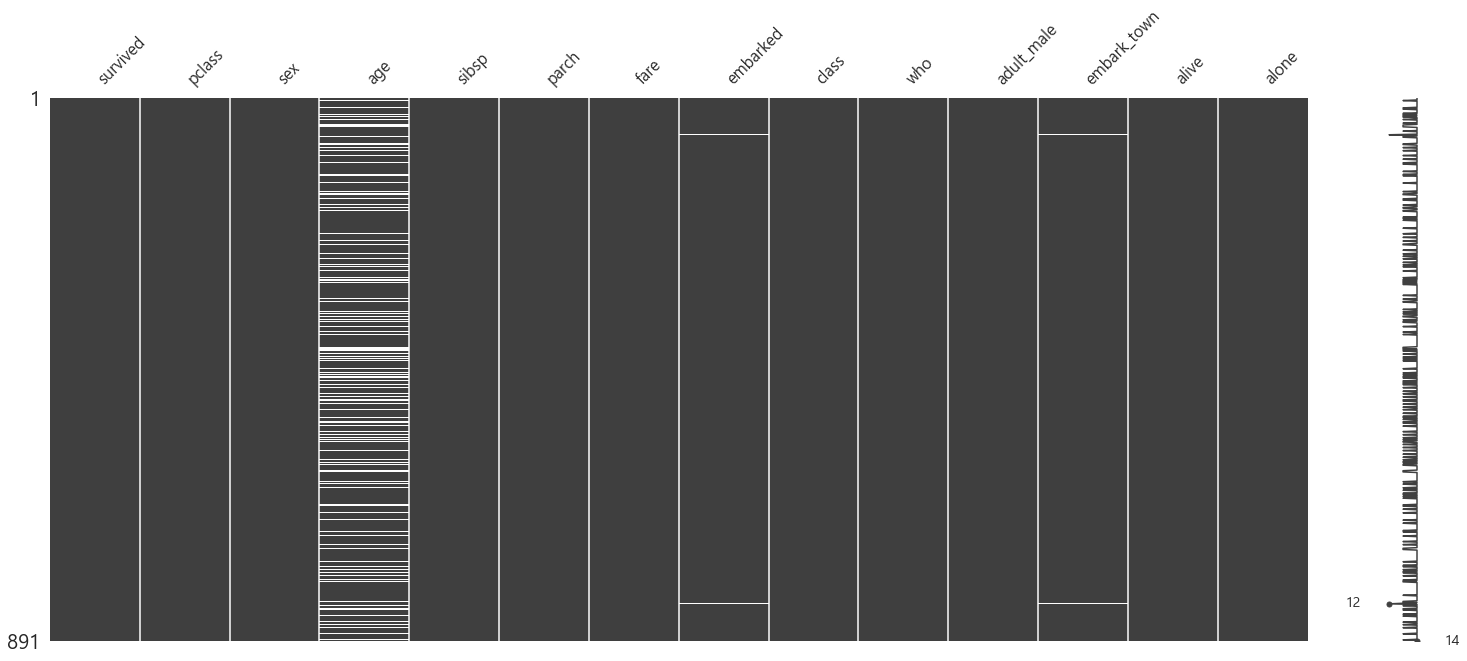

In [26]:
# 절반 이상이 비어있는 행 삭제 
df = titanic.copy()
df = df.dropna(thresh=int(len(df) * 0.5), axis=1)
msno.matrix(df)
plt.show()

#### 결측치 대체

- Scikit-learn.preprocessing의 Imputer 클래스를 사용한다.
- 1. `Imputer` 객체 생성, `strategy`를 `mean`,`median`,`most_frequent`로 지정 가능
- 2. `fit_transform ` 메서드를 사용해 새로운 df 생성

In [50]:
from sklearn.preprocessing import Imputer

df = titanic.copy()
imputer = Imputer(strategy= "median")
df['age'] = imputer.fit_transform(df[['age']])

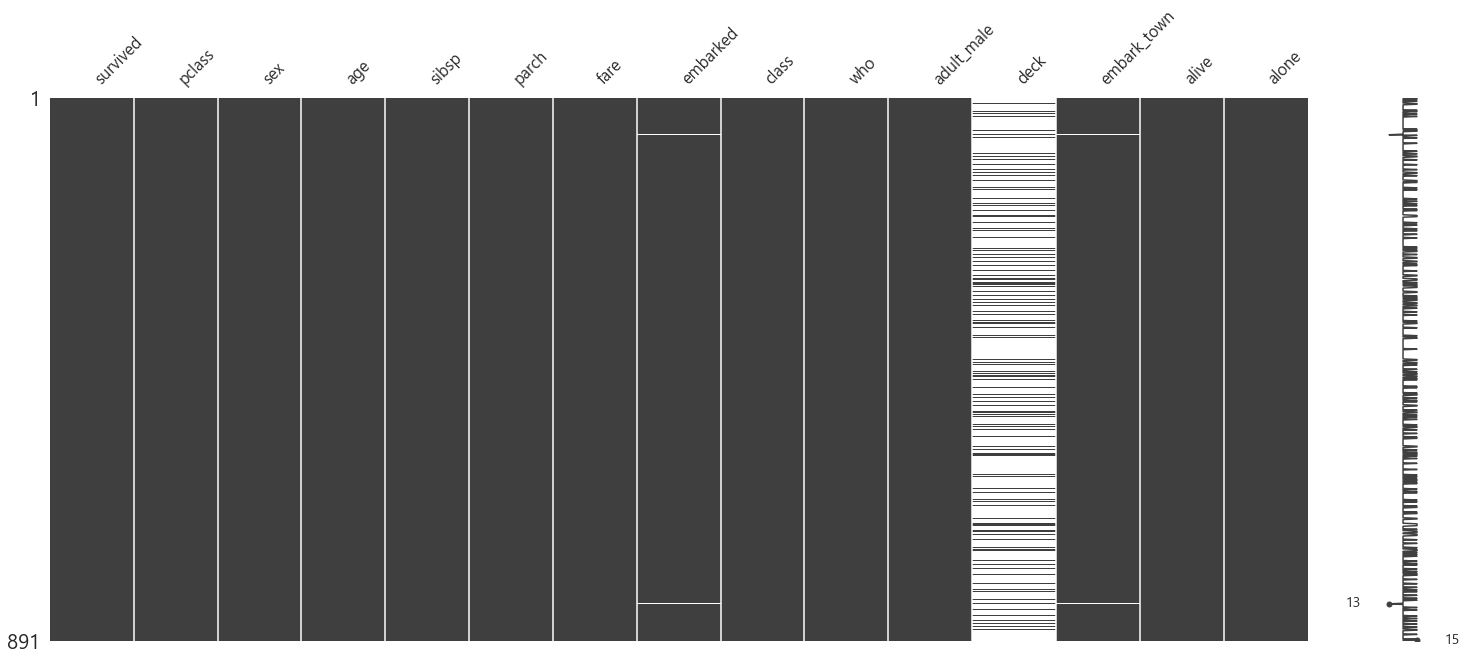

In [52]:
msno.matrix(df)
plt.show()

### patsy 패키지

- 데이터 선택, 조합에 편리한 패키지
- 문자열로 만드는 `formula`와 `data`를 인수로 받아 변형된 데이터프레임을 출력한다.

In [57]:
from patsy import demo_data
from patsy import dmatrix
df = pd.DataFrame(demo_data("x1", "x2", "x3", "x4", "x5"))

In [58]:
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


In [60]:
dmatrix('x1+0', df)

DesignMatrix with shape (5, 1)
       x1
  1.76405
  0.40016
  0.97874
  2.24089
  1.86756
  Terms:
    'x1' (column 0)